In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [84]:


# Replace the file path with your actual file path
file_path = r"E:\datasets\Dataset_4_Classification\Cat Activity\With_5val_3hopesize\Imblace_12_activities.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Assuming your columns are arranged such that the first 9 columns are sensor features and the last column is the label
# Extract sensor data and labels
sensor_data = df.iloc[:, :9].values
labels = df.iloc[:, -1].values

In [92]:
df

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label
0,0.120972,-0.458130,-0.873657,-10.690690,11.268616,17.570495,-66.707916,26.473785,-42.653228,0
1,0.116577,-0.475708,-0.893188,-6.845474,0.953674,7.255554,-67.907913,26.473785,-43.103225,0
2,0.110229,-0.473267,-0.890259,-3.122330,-6.183624,1.945496,-65.657913,28.423782,-42.653228,0
3,0.112671,-0.469360,-0.896118,1.817703,-5.390167,-2.384186,-65.057922,27.073791,-43.253234,0
4,0.136108,-0.460083,-0.893188,0.291824,2.052307,-3.849030,-66.407913,27.973785,-40.853225,0
...,...,...,...,...,...,...,...,...,...,...
1765820,-0.053503,-0.046534,-0.659381,438.172135,109.253236,32.202621,-0.182400,-27.577397,-9.339305,9
1765821,0.288393,-0.673570,-0.686428,2.242945,-9.063754,6.633501,-67.965325,8.661774,-47.658754,9
1765822,-0.203952,0.787711,-0.795416,160.081459,18.758745,2.433429,18.010834,-16.953975,37.021124,9
1765823,-0.135981,0.409613,-0.939455,-45.773678,2.961631,-9.736602,21.104270,9.314642,-29.670979,9


In [101]:
import pandas as pd

def remove_outliers(df):
    # Dictionary to store the indices of outliers for each column
    outlier_indices = {}

    # Iterate over each column in the dataframe
    for col in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col].quantile(0.1)
        q3 = df[col].quantile(0.9)
        iqr = q3 - q1

        # Define bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Find outliers and store their indices
        outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

    # Combine outlier indices from all columns
    all_outliers = []
    for col_indices in outlier_indices.values():
        all_outliers.extend(col_indices)

    # Remove duplicate indices
    all_outliers = list(set(all_outliers))

    # Remove outliers from the dataframe
    df_cleaned = df.drop(all_outliers)

    return df_cleaned

# Example usage:
# Assuming df is your dataframe
df_cleaned = remove_outliers(df)


In [102]:
df_cleaned

,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Mag_x,Mag_y,Mag_z,label
0,0.120972,-0.458130,-0.873657,-10.690690,11.268616,17.570495,-66.707916,26.473785,-42.653228,0
1,0.116577,-0.475708,-0.893188,-6.845474,0.953674,7.255554,-67.907913,26.473785,-43.103225,0
2,0.110229,-0.473267,-0.890259,-3.122330,-6.183624,1.945496,-65.657913,28.423782,-42.653228,0
3,0.112671,-0.469360,-0.896118,1.817703,-5.390167,-2.384186,-65.057922,27.073791,-43.253234,0
4,0.136108,-0.460083,-0.893188,0.291824,2.052307,-3.849030,-66.407913,27.973785,-40.853225,0
...,...,...,...,...,...,...,...,...,...,...
1765817,0.003881,0.612799,-1.250420,-248.228953,59.238810,15.299615,-18.004553,13.824413,25.008333,9
1765821,0.288393,-0.673570,-0.686428,2.242945,-9.063754,6.633501,-67.965325,8.661774,-47.658754,9
1765822,-0.203952,0.787711,-0.795416,160.081459,18.758745,2.433429,18.010834,-16.953975,37.021124,9
1765823,-0.135981,0.409613,-0.939455,-45.773678,2.961631,-9.736602,21.104270,9.314642,-29.670979,9


In [103]:
df_cleaned['label'].value_counts()

label
0    196530
1    189771
2    173611
5    172884
4    172395
7    172269
3    170782
8    167939
9    141190
6    121748
Name: count, dtype: int64

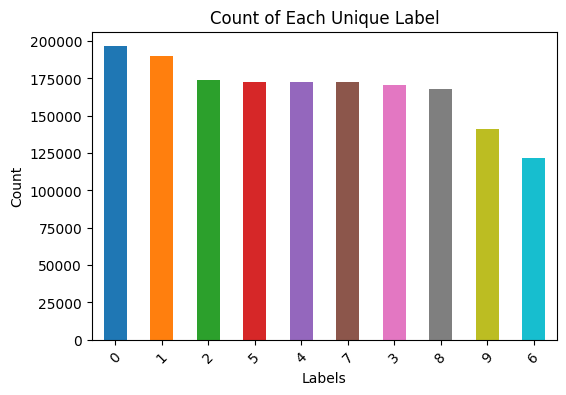

In [108]:
# Count the occurrences of each label
label_counts = df_cleaned['label'].value_counts()

# Plot the counts with different colors for each label
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=plt.cm.tab10(range(len(label_counts))))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Unique Label')
plt.xticks(rotation=45)
plt.show()

In [106]:
label_counts

label
0    196530
1    189771
2    173611
5    172884
4    172395
7    172269
3    170782
8    167939
9    141190
6    121748
Name: count, dtype: int64

In [54]:
accelerometer_data = df_cleaned.iloc[:, :3].values
gyro_data = df_cleaned.iloc[:, 3:6].values
mag_data = df_cleaned.iloc[:, 6:9].values
gyro_data.shape


(1679119, 3)

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

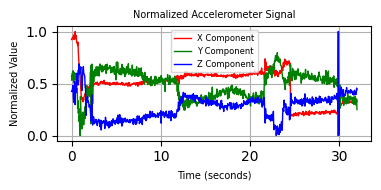

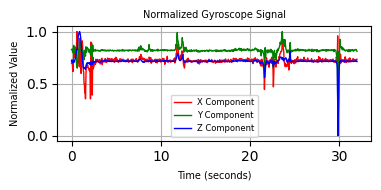

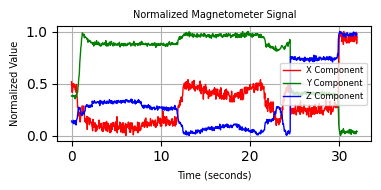

In [78]:
# Extract the range of interest
x = accelerometer_data[200:1000, 0]
y = accelerometer_data[200:1000, 1]
z = accelerometer_data[200:1000, 2]
x1 = gyro_data[200:1000, 0]  # Adjusted index to 0, 1, 2 to match data shape
y1 = gyro_data[200:1000, 1]
z1 = gyro_data[200:1000, 2]
x2 = mag_data[200:1000, 0]  # Adjusted index to 0, 1, 2 to match data shape
y2 = mag_data[200:1000, 1]
z2 = mag_data[200:1000, 2]

# Normalize each component
normalize = lambda data: (data - np.min(data)) / (np.max(data) - np.min(data))
x_norm, y_norm, z_norm = normalize(x), normalize(y), normalize(z)
x1_norm, y1_norm, z1_norm = normalize(x1), normalize(y1), normalize(z1)
x2_norm, y2_norm, z2_norm = normalize(x2), normalize(y2), normalize(z2)

# Calculate time points assuming a sampling frequency of 25 Hz
sampling_frequency = 25  # Hz
num_points = len(x_norm)
time = np.arange(num_points) / sampling_frequency
label_fontsize = 7
# Plot accelerometer data in a separate figure
fig1, ax1 = plt.subplots(figsize=(4,2))
ax1.plot(time, x_norm, label='X Component', color='r', linewidth =1)
ax1.plot(time, y_norm, label='Y Component', color='g',linewidth =1)
ax1.plot(time, z_norm, label='Z Component', color='b',linewidth =1)
ax1.set_xlabel('Time (seconds)', fontsize=label_fontsize)
ax1.set_ylabel('Normalized Value', fontsize=label_fontsize)
ax1.set_title('Normalized Accelerometer Signal', fontsize=label_fontsize)
ax1.legend()
ax1.grid()
ax1.legend(fontsize=6)
fig1.tight_layout()

# Plot gyroscope data in a separate figure
fig2, ax2 = plt.subplots(figsize=(4,2))
ax2.plot(time, x1_norm, label='X Component', color='r', linewidth =1)
ax2.plot(time, y1_norm, label='Y Component', color='g', linewidth =1)
ax2.plot(time, z1_norm, label='Z Component', color='b', linewidth =1)
ax2.set_xlabel('Time (seconds)', fontsize=label_fontsize)
ax2.set_ylabel('Normalized Value', fontsize=label_fontsize)
ax2.set_title('Normalized Gyroscope Signal', fontsize=label_fontsize)
ax2.legend()
ax2.grid()
ax2.legend(fontsize=6)
fig2.tight_layout()

# Plot magnetometer data in a separate figure
fig3, ax3 = plt.subplots(figsize=(4,2))
ax3.plot(time, x2_norm, label='X Component', color='r', linewidth =1)
ax3.plot(time, y2_norm, label='Y Component', color='g', linewidth =1)
ax3.plot(time, z2_norm, label='Z Component', color='b', linewidth =1)
ax3.set_xlabel('Time (seconds)', fontsize=label_fontsize)
ax3.set_ylabel('Normalized Value', fontsize=label_fontsize)
ax3.set_title('Normalized Magnetometer Signal', fontsize=label_fontsize)
ax3.legend()
ax3.grid()
ax3.legend(fontsize=6)
fig3.tight_layout()

# Show plots
plt.show()

In [5]:
sensor_data = df_cleaned.iloc[:, :9].values
labels = df_cleaned.iloc[:, -1].values

# Define window size and step size
window_size = 25
step_size = window_size

windows = []
aggregated_labels = []

# Iterate through the data to create windows and aggregate labels
for i in range(0, len(sensor_data) - window_size, step_size):
    window_data = sensor_data[i:i+window_size]  # Extract data for the window
    window_labels = labels[i:i+window_size]  # Extract labels for the window
    
    # Aggregate labels using majority voting
    window_label = pd.Series(window_labels).mode()[0]  # Get the most frequent label
    
    windows.append(window_data)  # Store the window data
    aggregated_labels.append(window_label)  # Store the aggregated label

# Convert windows and aggregated labels to arrays for further processing
windows_array = np.array(windows)
aggregated_labels_array = np.array(aggregated_labels)

In [6]:
windows_array.shape

(67164, 25, 9)

In [7]:
len(aggregated_labels)

67164

In [9]:
num_windows, window_length, num_features = windows_array.shape
num_windows, window_length, num_features


(67164, 25, 9)

In [133]:
X_train_reshaped = windows_array.reshape(num_windows, window_length * num_features)
X_train_reshaped.shape

(67164, 225)

In [135]:
def normalize_array(array):
    # Calculate min and max values across the entire array
    min_vals = np.min(array, axis=0)
    max_vals = np.max(array, axis=0)
    
    # Normalize array
    normalized_array = (array - min_vals) / (max_vals - min_vals)
    
    return normalized_array

# Normalize X_train_reshaped
normalized_X_train = normalize_array(X_train_reshaped)

In [154]:
# signal_acc = X_train_reshaped[0, :]
# signal_gyro= X_train_reshaped[35000, :]
signal_mag= normalized_X_train [-1, :]

In [115]:
# # Create subplots
# fig, axs = plt.subplots(3, 1, figsize=(6,4),dpi=130)

# # Plot signal_acc
# axs[0].plot(signal_acc, color='blue')
# axs[0].set_title('Signal Acc',fontsize=8)
# axs[0].set_xlabel('Time',fontsize=8,fontweight='bold')
# axs[0].set_ylabel('Amplitude',fontsize=8,fontweight='bold')
# axs[0].grid(True)  # Add grid

# # Plot signal_gyro
# axs[1].plot(signal_gyro, color='green')
# axs[1].set_title('Signal Gyro',fontsize=8)
# axs[1].set_xlabel('Time',fontsize=8,fontweight='bold')
# axs[1].set_ylabel('Amplitude',fontsize=8,fontweight='bold')
# axs[1].grid(True)  # Add grid

# # Plot signal_mag
# axs[2].plot(signal_mag, color='red')
# axs[2].set_title('Signal Mag',fontsize=8)
# axs[2].set_xlabel('Time',fontsize=8,fontweight='bold')
# axs[2].set_ylabel('Amplitude',fontsize=8,fontweight='bold')
# axs[2].grid(True)  # Add grid

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show plot
# plt.show()

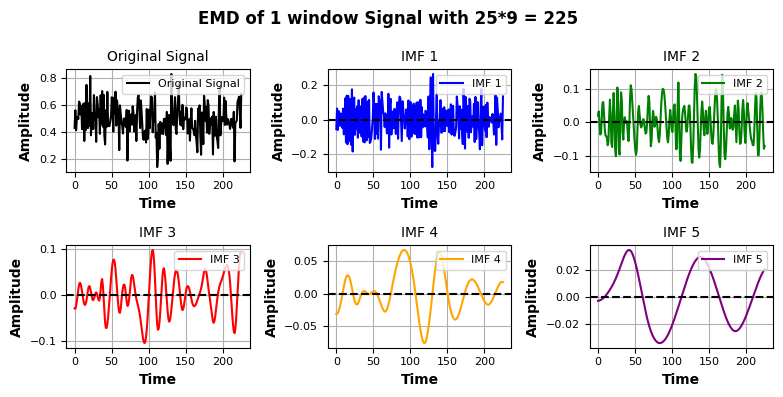

In [155]:
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

# Generate a dummy time array
time = np.linspace(0, len(signal_mag), len(signal_mag))

# Perform Empirical Mode Decomposition (EMD)
def emd_decomposition(data, num_imfs=5):
    emd = EMD()
    imfs = emd(data)
    return imfs[:num_imfs]

# Decompose the signal into IMFs
imfs = emd_decomposition(signal_mag)

# Plot the original signal and IMFs
plt.figure(figsize=(8, 4))

# Plot original signal
plt.subplot(2, 3, 1)
plt.plot(time, signal_mag, label='Original Signal', color='black')
plt.title('Original Signal', fontsize=10)
plt.xlabel('Time', fontsize=10, fontweight='bold')
plt.ylabel('Amplitude', fontsize=10, fontweight='bold')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)

# Plot IMFs
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i, imf in enumerate(imfs[:5]):
    plt.subplot(2, 3, i+2)
    plt.plot(time, imf, label=f'IMF {i+1}', color=colors[i])
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.title(f'IMF {i+1}', fontsize=10)
    plt.xlabel('Time', fontsize=10, fontweight='bold')
    plt.ylabel('Amplitude', fontsize=10, fontweight='bold')
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(True)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.tick_params(axis='y', which='major', labelsize=8)

# Add a title to the entire figure
plt.suptitle('EMD of 1 window Signal with 25*9 = 225', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Features for Band 1: [[0.0007208213725514107, 0.0], [0.08223920729824644, 0.0], [0.00849285713228555, 0.0], [-0.17771196368027758, 0.0], [-0.004535214374292107, 0.0], [0.11056601601086263, 0.0], [-0.029005666000762008, 0.0], [0.08806023741900805, 0.0], [-0.05241707827560123, 0.0], [-0.06376101285714866, 0.0], [0.004405495761242231, 0.0], [-0.03900628963237347, 0.0], [0.14566016170619467, 0.0], [-0.014038687586572215, 0.0], [-0.10318276068332402, 0.0], [0.0672767411894707, 0.0], [-0.010020745053439903, 0.0], [-0.10807473753836724, 0.0], [0.11911671692370823, 0.0], [0.0607313733842511, 0.0], [-0.06524437357308703, 0.0], [-0.08019434303907771, 0.0], [-0.05109641200859055, 0.0], [0.07606085272430436, 0.0], [0.13824925952739697, 0.0], [-0.08995195278183415, 0.0], [-0.07160820043702937, 0.0], [0.1469834807898651, 0.0], [-0.053512065355121013, 0.0], [-0.08128545680144145, 0.0], [-0.015015833816883768, 0.0], [0.03279149019424955, 0.0], [-0.0030749206788060097, 0.0], [0.09147265215704581, 0.0],

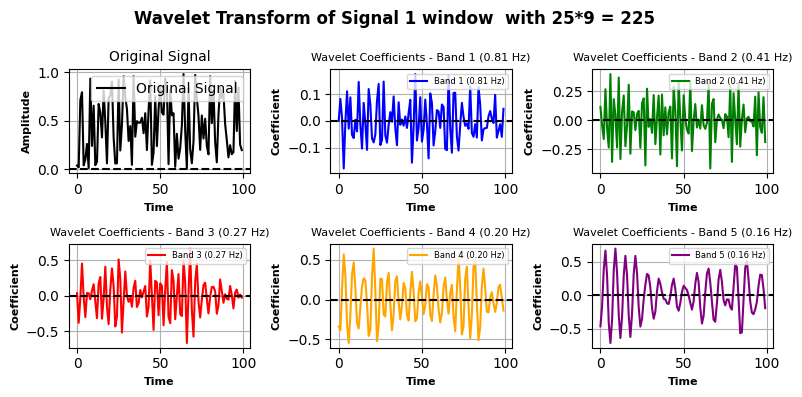

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Example signal (replace with your signal)
signal_mag = np.random.rand(100)

# Perform Wavelet Transform (Continuous Wavelet Transform - CWT)
def wavelet_features(data, wavelet='morl', level=5):
    coefficients, frequencies = pywt.cwt(data, np.arange(1, level + 1), wavelet)
    return coefficients, frequencies

# Extract features from each frequency band
def extract_band_features(coefficients):
    band_features = []
    for band in coefficients:
        # Example feature extraction (replace this with your own feature extraction method)
        mean = np.mean(band)
        std_dev = np.std(band)
        band_features.append([mean, std_dev])
    return band_features

# Plot the original signal and wavelet coefficients for each frequency band
time = np.arange(len(signal_mag))
plt.figure(figsize=(8, 4))
coefficients, frequencies = wavelet_features(signal_mag)

# Plot original signal in the first subplot
plt.subplot(2, 3, 1)
plt.plot(time, signal_mag, label='Original Signal', color='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.title('Original Signal', fontsize=10)
plt.xlabel('Time', fontsize=8, fontweight='bold')
plt.ylabel('Amplitude', fontsize=8, fontweight='bold')
plt.grid(True)
plt.legend()

# Define a list of colors
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed

# Plot wavelet coefficients for each frequency band with corresponding frequency bands
for i in range(len(coefficients)):
    plt.subplot(2, 3, i + 2)
    plt.plot(time, coefficients[i], label=f'Band {i+1} ({frequencies[i]:.2f} Hz)', color=colors[i])
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.title(f'Wavelet Coefficients - Band {i+1} ({frequencies[i]:.2f} Hz)', fontsize=8)
    plt.xlabel('Time', fontsize=8, fontweight='bold')
    plt.ylabel('Coefficient', fontsize=8, fontweight='bold')
    plt.legend(loc='upper right', fontsize=6)
    plt.grid(True)
    # Extract features from each frequency band
    band_features = extract_band_features(coefficients[i])
    print(f'Features for Band {i+1}: {band_features}')  # Print the extracted features for demonstration

# Add a title to the entire figure
plt.suptitle('Wavelet Transform of Signal 1 window  with 25*9 = 225', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [152]:
# the signals names 
# signal_acc = X_train_reshaped[0, :]
# signal_gyro= X_train_reshaped[35000, :]
# signal_mag= X_train_reshaped[-1, :]

In [48]:
# # def emd_decomposition(data, num_imfs=5):
# #     emd = EMD()
# #     imfs = emd(data)
# #     return imfs[:num_imfs]

# # # Decompose the signal into IMFs
# # imfs = emd_decomposition(signal_mag)
# #___________________
# # Perform Wavelet Transform (Continuous Wavelet Transform - CWT)
# def wavelet_features(data, wavelet='morl', level=5):
#     coefficients, frequencies = pywt.cwt(data, np.arange(1, level + 1), wavelet)
#     return coefficients, frequencies

# # Extract features from each frequency band
# def extract_band_features(coefficients):
#     band_features = []
#     for band in coefficients:
#         # Example feature extraction (replace this with your own feature extraction method)
#         mean = np.mean(band)
#         std_dev = np.std(band)
#         band_features.append([mean, std_dev])
#     return band_features


# main file X_train_reshaped



In [163]:
import numpy as np
import pandas as pd
from scipy.stats import describe
import pywt
from PyEMD import EMD

In [164]:

# Define the features dictionary
features = {'f1_mean': [], 'f1_count': [], 'f1_variance': [], 'f1_kurtosis': [], 'f1_min': [], 'f1_max': [],
            'f2_mean': [], 'f2_count': [], 'f2_variance': [], 'f2_kurtosis': [], 'f2_min': [], 'f2_max': [],
            'f3_mean': [], 'f3_count': [], 'f3_variance': [], 'f3_kurtosis': [], 'f3_min': [], 'f3_max': [],
            'f4_mean': [], 'f4_count': [], 'f4_variance': [], 'f4_kurtosis': [], 'f4_min': [], 'f4_max': [],
            'f1_w_mean': [], 'f1_w_count': [], 'f1_w_variance': [], 'f1_w_kurtosis': [], 'f1_w_min': [], 'f1_w_max': [],
            'f2_w_mean': [], 'f2_w_count': [], 'f2_w_variance': [], 'f2_w_kurtosis': [], 'f2_w_min': [], 'f2_w_max': [],
            'f3_w_mean': [], 'f3_w_count': [], 'f3_w_variance': [], 'f3_w_kurtosis': [], 'f3_w_min': [], 'f3_w_max': [],
            'f4_w_mean': [], 'f4_w_count': [], 'f4_w_variance': [], 'f4_w_kurtosis': [], 'f4_w_min': [], 'f4_w_max': []}

In [166]:
import numpy as np
from scipy.stats import kurtosis


i = 1  

# Loop over each data point
for img in X_train_reshaped:
    # Perform EMD decomposition
    imfs = emd_decomposition(img)
    
    # Loop over each IMF
    for imf in imfs:
        # Calculate features for each IMF
        f_mean = np.mean(imf)
        f_count = len(imf)
        f_variance = np.var(imf)
        f_kurtosis = kurtosis(imf)
        f_min = np.min(imf)
        f_max = np.max(imf)
        
        # Append calculated features to the dictionary
        features[f'f{i}_mean'].append(f_mean)
        features[f'f{i}_count'].append(f_count)
        features[f'f{i}_variance'].append(f_variance)
        features[f'f{i}_kurtosis'].append(f_kurtosis)
        features[f'f{i}_min'].append(f_min)
        features[f'f{i}_max'].append(f_max)
        
        i += 1  # Increment i for the next iteration
    i = 1  # Reset i for the next data point


KeyError: 'f5_mean'

In [165]:
import numpy as np
from scipy.stats import kurtosis




# Initialize i outside the loop
i = 1  

# Loop over each data point
for img in normalized_X_train:
    # Perform EMD decomposition
    coff =wavelet_features(img)
    
    # Loop over each IMF
    for coff in imfs:
        # Calculate features for each IMF
        f_mean = np.mean(coff)
        f_count = len(coff)
        f_variance = np.var(coff)
        f_kurtosis = kurtosis(coff)
        f_min = np.min(coff)
        f_max = np.max(coff)
        
        # Append calculated features to the dictionary
        features[f'f{i}_w_mean'].append(f_mean)
        features[f'f{i}_w_count'].append(f_count)
        features[f'f{i}_w_variance'].append(f_variance)
        features[f'f{i}_w_kurtosis'].append(f_kurtosis)
        features[f'f{i}_w_min'].append(f_min)
        features[f'f{i}_w_max'].append(f_max)
        
        i += 1  # Increment i for the next iteration
    i = 1  # Reset i for the next data point


KeyError: 'f5_w_mean'

In [173]:
num_keys = len(features)
print("Number of keys in the dictionary:", num_keys)

Number of keys in the dictionary: 48


In [174]:
num_values_per_key = {key: len(value) for key, value in features.items()}
print("Number of values per key:", num_values_per_key)

Number of values per key: {'f1_mean': 1, 'f1_count': 1, 'f1_variance': 1, 'f1_kurtosis': 1, 'f1_min': 1, 'f1_max': 1, 'f2_mean': 1, 'f2_count': 1, 'f2_variance': 1, 'f2_kurtosis': 1, 'f2_min': 1, 'f2_max': 1, 'f3_mean': 1, 'f3_count': 1, 'f3_variance': 1, 'f3_kurtosis': 1, 'f3_min': 1, 'f3_max': 1, 'f4_mean': 1, 'f4_count': 1, 'f4_variance': 1, 'f4_kurtosis': 1, 'f4_min': 1, 'f4_max': 1, 'f1_w_mean': 1, 'f1_w_count': 1, 'f1_w_variance': 1, 'f1_w_kurtosis': 1, 'f1_w_min': 1, 'f1_w_max': 1, 'f2_w_mean': 1, 'f2_w_count': 1, 'f2_w_variance': 1, 'f2_w_kurtosis': 1, 'f2_w_min': 1, 'f2_w_max': 1, 'f3_w_mean': 1, 'f3_w_count': 1, 'f3_w_variance': 1, 'f3_w_kurtosis': 1, 'f3_w_min': 1, 'f3_w_max': 1, 'f4_w_mean': 1, 'f4_w_count': 1, 'f4_w_variance': 1, 'f4_w_kurtosis': 1, 'f4_w_min': 1, 'f4_w_max': 1}


In [55]:
import pandas as pd

# Convert the dictionary to a DataFrame
features_df = pd.DataFrame(features)

# # Specify the file path where you want to save the CSV file
# file_path = r"E:\newenv\cat_data_with_48_features.csv"

# # Save the DataFrame to CSV
# features_df.to_csv(file_path, index=False)  # Set



In [56]:
#traning the model :
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train_reshaped and aggregated_labels_array are already defined
# If not, you should define them before using this code

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, aggregated_labels_array, test_size=0.2, random_state=42
)

# Print shapes of the splits to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (53731, 225)
X_test shape: (13433, 225)
y_train shape: (53731,)
y_test shape: (13433,)


In [169]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53731, 225) (13433, 225) (53731,) (13433,)


In [170]:
slice_10_pred =  y_test[0:10,]
slice_10_pred

array([0, 2, 1, 4, 2, 6, 8, 8, 3, 6], dtype=int64)

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test is your test dataset and predictions is the array with your predictions
# Slice 10 rows from X_test
slice_10_rows = X_test[:10, :]
print(slice_10_rows.shape)  # Should print (10, 225)

# Reshape the slice to a 1-dimensional array
reshaped_data = slice_10_rows.reshape(-1)




(10, 225)


In [172]:
predictions = []

# Loop over each row and get the model prediction
for row in slice_10_rows:
    prediction = rf_model.predict(row.reshape(1, -1))  # Reshape row to (1, 225)
    predictions.append(prediction[0])  # Store the prediction

# Print the predictions
print(predictions)

NameError: name 'rf_model' is not defined

In [152]:
print(predictions)
len(predictions) # Number


[0, 1, 1, 4, 2, 6, 8, 8, 1, 6]


10

In [167]:
# Define colors for different predictions
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Define the prediction labels
pred_labels = {0: 'Resting', 1: "Grooming", 2: "Walking", 3: "Eating", 4: "Vomiting", 5: "Scratching", 6: "Running", 7: "Urinating", 8: "Coughing", 9: "Jumping"}

# Create a plot
plt.figure(figsize=(10, 8))

# Plot each segment with a different color based on the prediction
for i in range(len(predictions)):  # Loop over the predictions list
    start_index = i * 225
    end_index = (i + 1) * 225
    plt.plot(range(start_index, end_index), reshaped_data[start_index:end_index], color=colors[predictions[i]], label=pred_labels[predictions[i]])

# Add vertical lines after every 225 points
for i in range(1, 10):  # 10 rows, so 9 vertical lines needed
    plt.axvline(x=i * 225, color='black', linestyle='--')

plt.title("Plot of Each window and the model Predictions")
plt.xlabel("Index")
plt.ylabel("Value")

# Add a legend
plt.legend()
plt.show()

NameError: name 'predictions' is not defined

<Figure size 1000x800 with 0 Axes>

In [148]:
# Initialize RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

In [149]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9391051887143601


In [61]:
# random forest using gentic algo

In [62]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def initialize_population(size, min_estimators, max_estimators):
    return np.random.randint(min_estimators, max_estimators, size)

def fitness(individual, X1_train, y1_train, X1_val, y1_val):
    model = RandomForestClassifier(n_estimators=individual, random_state=42)
    model.fit(X1_train, y1_train)
    predictions = model.predict(X1_val)
    return accuracy_score(y1_val, predictions)

def select_parents(population, fitnesses, num_parents):
    parents = np.empty(num_parents)
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitnesses)
        parents[parent_num] = population[max_fitness_idx]
        fitnesses[max_fitness_idx] = -np.inf
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k] = (parents[parent1_idx] + parents[parent2_idx]) // 2
    return offspring

def mutation(offspring_crossover, min_estimators, max_estimators):
    for idx in range(offspring_crossover.shape[0]):
        random_change = np.random.randint(-5, 6)  # Small random change
        new_value = offspring_crossover[idx] + random_change
        offspring_crossover[idx] = np.clip(new_value, min_estimators, max_estimators)
    return offspring_crossover

# Assuming you have df1_train, df1_validation, etc.
X1_train = X_train
y1_train =  y_train
X1_val =  X_test
y1_val = y_test

# Genetic algorithm parameters
num_generations = 10
population_size = 10
num_parents_mating = 4
min_estimators = 10
max_estimators = 200

# Initialize population
population = initialize_population(population_size, min_estimators, max_estimators)

for generation in range(num_generations):
    fitnesses = np.array([fitness(individual, X1_train, y1_train, X1_val, y1_val) for individual in population])
    parents = select_parents(population, fitnesses, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=population_size - parents.shape[0])
    offspring_mutation = mutation(offspring_crossover, min_estimators, max_estimators)
    population[:parents.shape[0]] = parents
    population[parents.shape[0]:] = offspring_mutation

# Best solution
best_fitness_idx = np.argmax(fitnesses)
best_solution = population[best_fitness_idx]
print("Best solution : ", best_solution)
print("Best solution fitness : ", fitnesses[best_fitness_idx])


Best solution :  200
Best solution fitness :  0.9431251395816274


In [63]:
# # for plotting the generation with fitness values
# import matplotlib.pyplot as plt

# # Initialize lists to store generation and best fitness
# generations = []
# best_fitnesses = []

# # Genetic algorithm parameters
# num_generations = 10
# population_size = 10
# num_parents_mating = 4
# min_estimators = 10
# max_estimators = 200

# # Initialize population
# population = initialize_population(population_size, min_estimators, max_estimators)

# for generation in range(num_generations):
#     fitnesses = np.array([fitness(individual, X1_train, y1_train, X1_val, y1_val) for individual in population])
#     parents = select_parents(population, fitnesses, num_parents_mating)
#     offspring_crossover = crossover(parents, offspring_size=population_size - parents.shape[0])
#     offspring_mutation = mutation(offspring_crossover, min_estimators, max_estimators)
#     population[:parents.shape[0]] = parents
#     population[parents.shape[0]:] = offspring_mutation

#     # Track the best fitness and corresponding generation
#     best_fitness_idx = np.argmax(fitnesses)
#     best_fitness = fitnesses[best_fitness_idx]
#     best_solution = population[best_fitness_idx]
#     generations.append(generation)
#     best_fitnesses.append(best_fitness)

#     print("Generation:", generation, "Best solution fitness:", best_fitness)

# # Plotting
# plt.plot(generations, best_fitnesses)
# plt.xlabel('Generation')
# plt.ylabel('Best Fitness')
# plt.title('Generation vs Best Fitness')
# plt.show()

# print("Best solution : ", best_solution)
# print("Best solution fitness : ", best_fitness)
